# **Assignment 1: Data Pre-Processing**

The main aim of this project is to perform data pre-processing and image pre-processing in improving the performance of machine learning models. 

***Data Preprocessing:***

*   Cleaning and transforming raw data into a suitable format for analysis.
*   Reducing noise and redundancy through feature selection.
*   Analyzing the impact of preprocessing on structured data for supervised learning tasks.



# **Data Processing: Arthritis Profile**

**Case study :** Arthritis is a chronic condition that affects millions globally, with severity levels ranging from mild to severe. Accurate classification of arthritis severity is critical for optimizing patient outcomes, as treatment plans can vary significantly based on the disease's progression. A healthcare provider wants to classify arthritis patients into different severity levels (e.g., mild, moderate, severe) based on their clinical, biochemical, and lifestyle data. By accurately predicting severity, the provider can recommend tailored treatments such as physical therapy, medications, or surgical interventions. For doing such analysis, we need to do following steps:

# **Step 1: Data Acquisition_ADP**

***Data Collection :*** Arthritis Profile dataset (ADP) was collected for one year from February 2021 to February 2022. Demographic data like age and gender, as well as Arthritis Profile investigations, were collected from the lab for the autoimmune arthritis disease study. Table 1 indicates the features or attributes in the APD dataset. The APD dataset consists of 24 features.

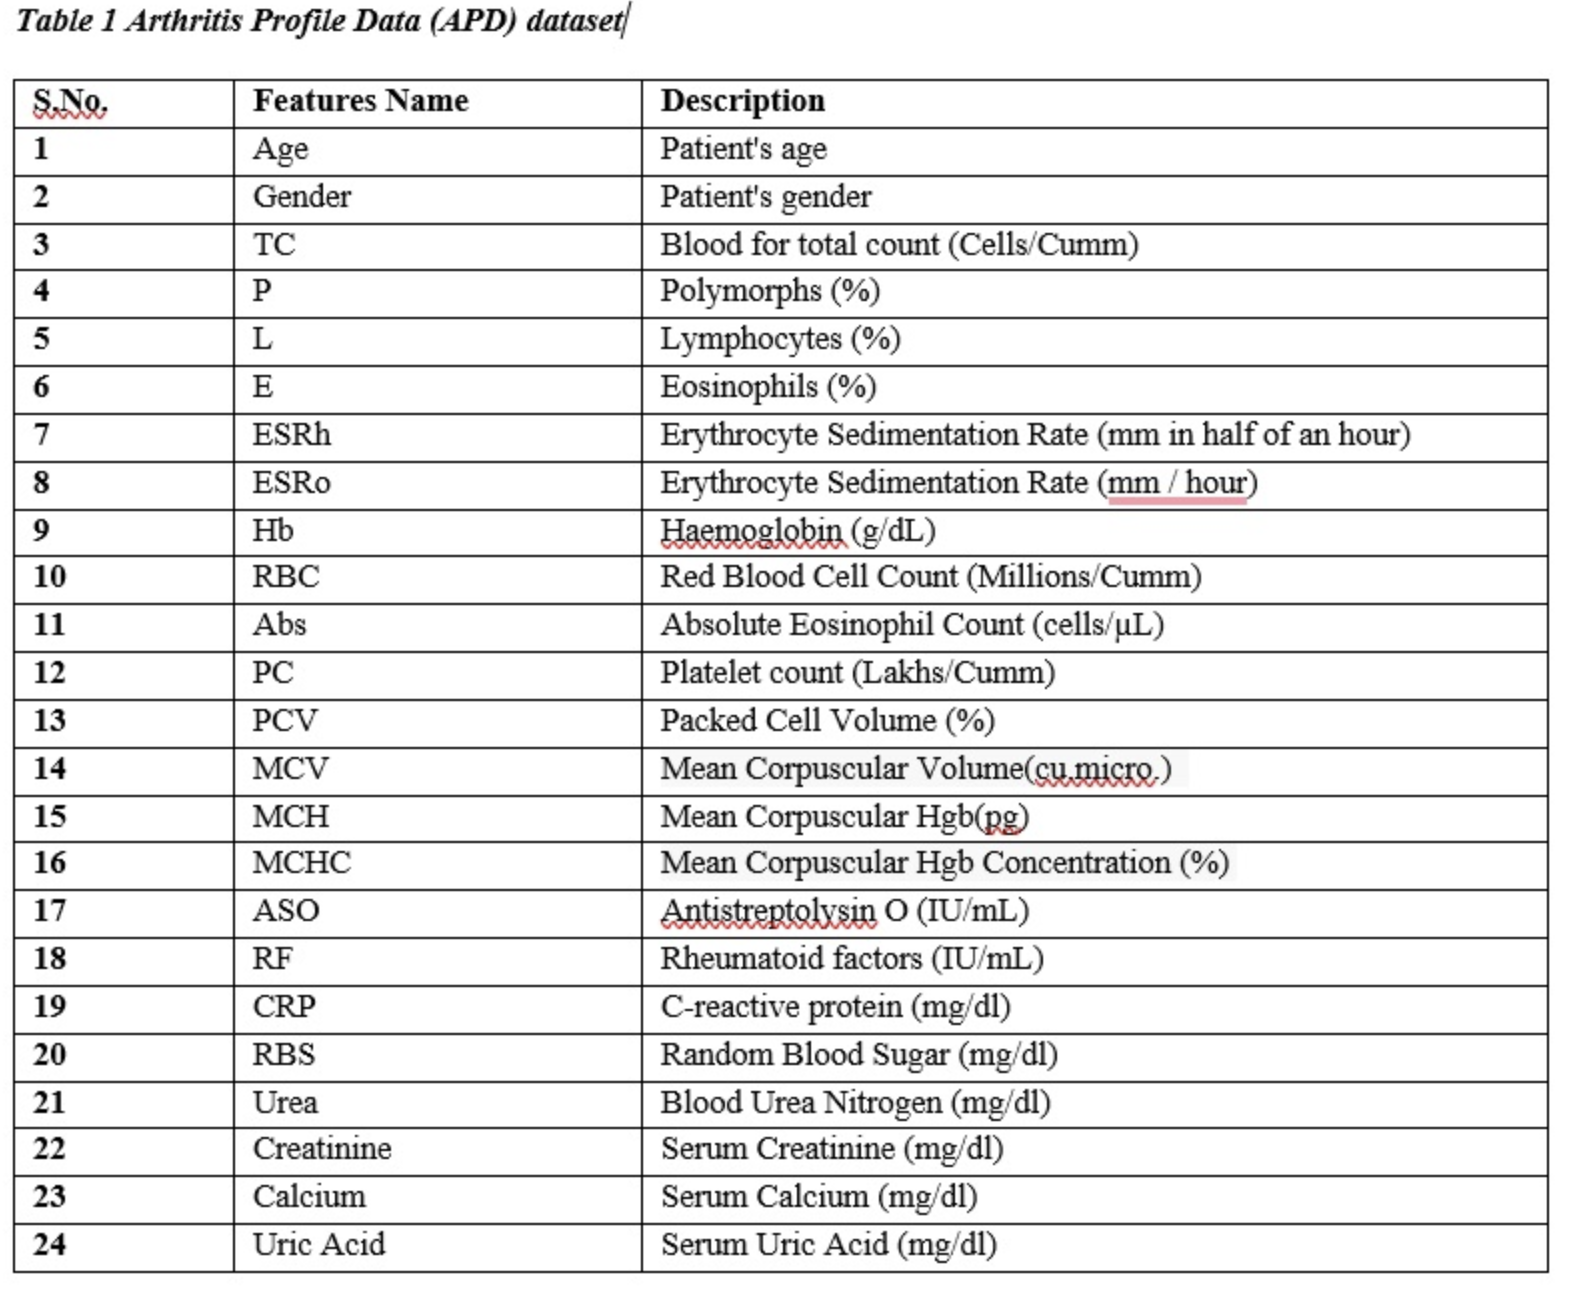

Using Python coding,we read the file, show the number of the samples, features, and what type of values each feature consist of(Discrete or Continous)


In [10]:
import pandas as pd

df = pd.read_excel("APDDataset 3 (1) (1) (2)-2.xlsx")
df = df.iloc[:, 1:]

n_samples, n_features = df.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}\n")

col_types = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        unique_vals = df[col].nunique()
        if unique_vals < 20:   
            col_types[col] = "Discrete"
        else:
            col_types[col] = "Continuous"
    else:
        col_types[col] = "Discrete"   # non-numeric treated as discrete

summary = pd.DataFrame({
    "Column": df.columns,
    "DataType": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values,
    "Type": [col_types[col] for col in df.columns]
})

display(summary)

n_discrete = sum(1 for t in col_types.values() if t == "Discrete")
n_continuous = sum(1 for t in col_types.values() if t == "Continuous")

print(f"\nTotal Discrete features: {n_discrete}")
print(f"Total Continuous features: {n_continuous}")


Number of samples: 102
Number of features: 25



,Column,DataType,Non-Null Count,Type
0,Gender_M,int64,102,Discrete
1,Age,float64,70,Continuous
2,TC,float64,98,Continuous
3,P,float64,99,Continuous
4,L,float64,99,Continuous
5,E,float64,99,Discrete
6,ESRh,float64,94,Discrete
7,ESRo,float64,94,Discrete
8,Hb,float64,98,Continuous
9,RBC,float64,29,Discrete



Total Discrete features: 16
Total Continuous features: 9


# **Step 2: Data Pre-Processing**

Data pre-processing is the process of transforming raw data into a clean, structured, and usable format for analysis or modeling. It is a crucial step in data science and machine learning to ensure the quality and reliability of the results. In this assignment, we only focus on data pre-processing. 

**Note:** This data is not suitable for any type of training and modeling, because of limited number of samples.

*2.1 Data Cleaning*: Detect if the data consist of any missing values or duplicates.

Also, using Box Plots, we show if the data consist of any outliers. 

Also, are we check if we are dealing with noisy data. 

In [11]:
# Missing and Duplicate Values 
import pandas as pd
import numpy as np

df = pd.read_excel("APDDataset 3 (1) (1) (2)-2.xlsx")

missing_before = df.isnull().sum()
print(" Missing Values per Column BEFORE Imputation:")
display(missing_before.to_frame("Missing Values (Before)"))

duplicates = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates dropped. New dataset shape: {df.shape}")
else:
    print("No duplicate rows detected.")


 Missing Values per Column BEFORE Imputation:


,Missing Values (Before)
Unnamed: 0,0
Gender_M,0
Age,32
TC,4
P,3
L,3
E,3
ESRh,8
ESRo,8
Hb,4



 Number of duplicate rows: 0
No duplicate rows detected.


In [12]:

imputation_values = {}

# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Continuous → we use median
            fill_value = df[col].median()
            df[col].fillna(fill_value, inplace=True)
            imputation_values[col] = fill_value
        else:
            # Discrete → we use mode
            fill_value = df[col].mode()[0]
            df[col].fillna(fill_value, inplace=True)
            imputation_values[col] = fill_value


#  How many values were filled per column) 
filled_summary = []

for col in df.columns:
    if col in imputation_values:
        filled_summary.append([col, missing_before[col], imputation_values[col]])

if filled_summary:
    filled_table = pd.DataFrame(filled_summary, columns=["Column", "Values Filled", "Imputed With"])
    print("\n Imputation Summary:")
    display(filled_table)
else:
    print("\nNo imputation was necessary.")



 Imputation Summary:


/var/folders/n0/1cz09yld15z_sj2k4jnqp3940000gn/T/ipykernel_26787/1294694936.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)


,Column,Values Filled,Imputed With
0,Age,32,51.5
1,TC,4,8900.0
2,P,3,59.0
3,L,3,35.0
4,E,3,6.0
5,ESRh,8,13.0
6,ESRo,8,25.0
7,Hb,4,10.4
8,RBC,73,4.1
9,Abs,24,550.0


We first checked for missing values and duplicate records in the dataset.  
- Missing values can bias results or reduce statistical power. We handle them by imputing the median, which works against outliers compared to the mean.  
- There is no duplicate data and hence nothing to be done about it. 


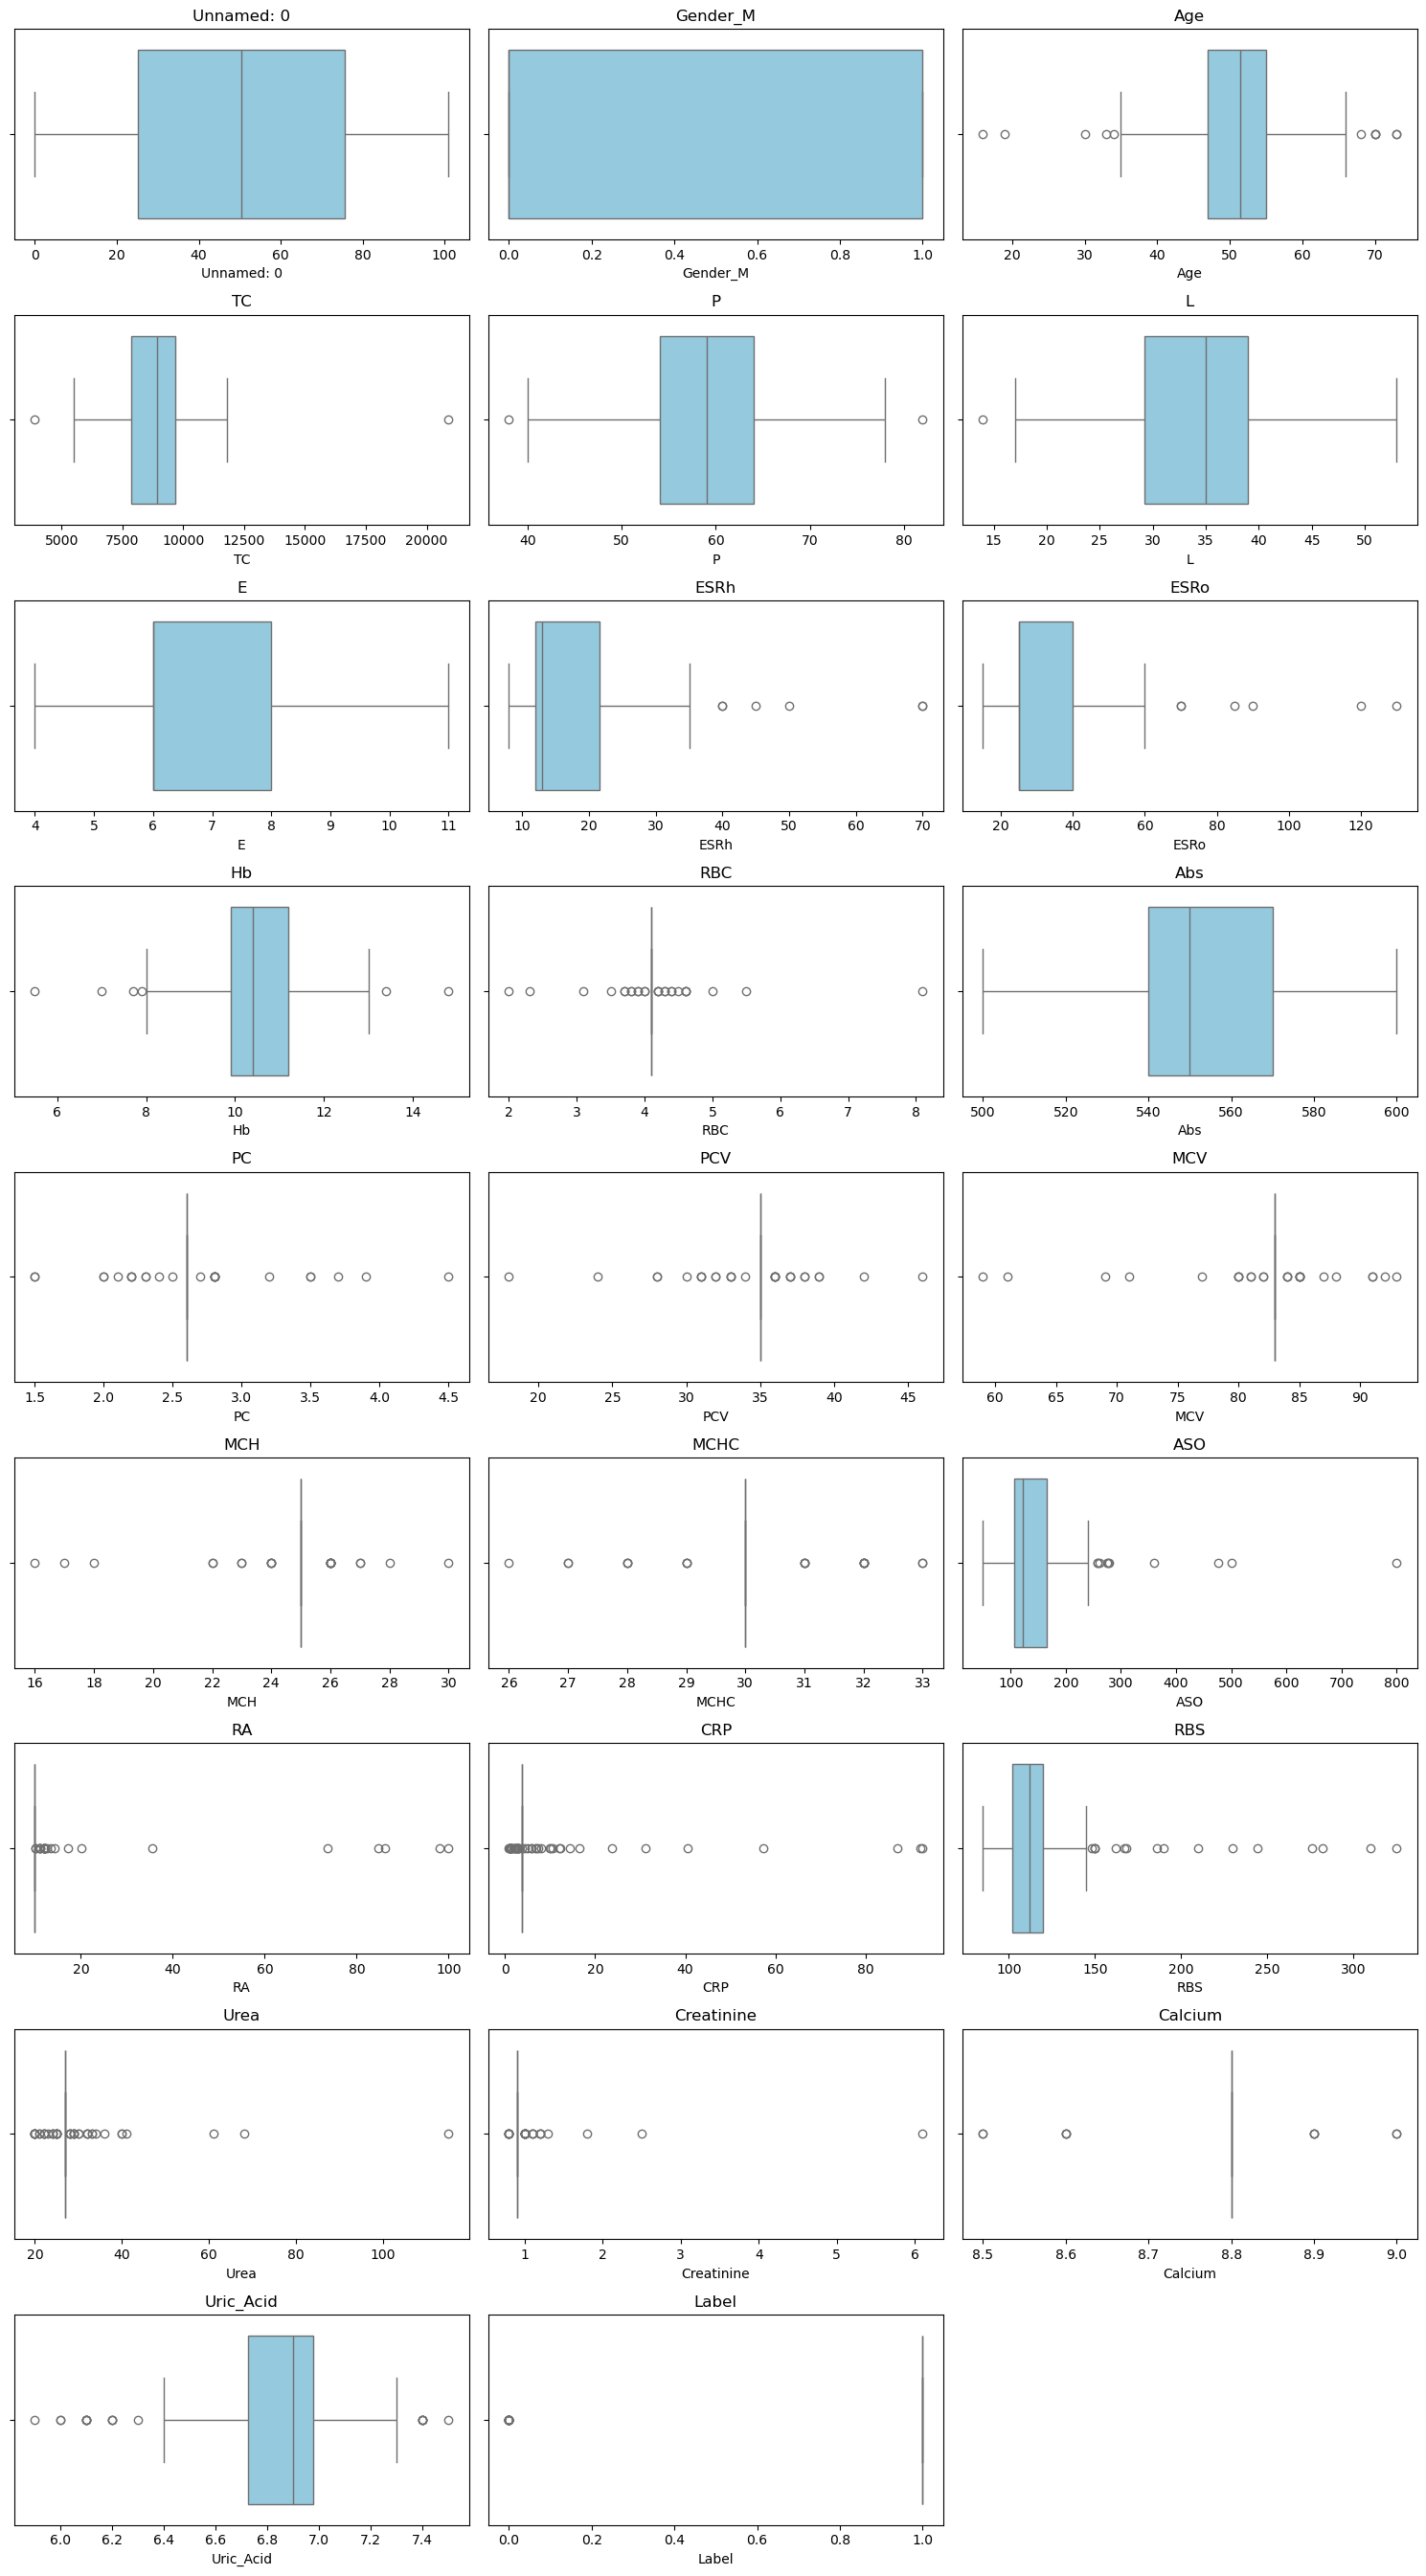

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = df.select_dtypes(include=[np.number]).columns
n = len(numeric_cols)

cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"{col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



The boxplots show extreme values in lab test results (e.g., CRP, ESRh, ESRo).  
These outliers represent patients with unusually high biomarker values, which may indicate noisy data or rare cases.


In [14]:
# Statistical Description 
print("\n Statistical Summary:")
display(df.describe().T)



 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,102.0,50.500000,29.588849,0.00,25.2500,50.5,75.7500,101.00
Gender_M,102.0,0.333333,0.473732,0.00,0.0000,0.0,1.0000,1.00
Age,102.0,51.088235,10.038641,16.00,47.0000,51.5,55.0000,73.00
TC,102.0,8846.078431,1887.933103,3900.00,7850.0000,8900.0,9675.0000,20900.00
P,102.0,58.950980,7.761772,38.00,54.0000,59.0,64.0000,82.00
L,102.0,34.352941,7.303393,14.00,29.2500,35.0,39.0000,53.00
E,102.0,6.745098,1.686794,4.00,6.0000,6.0,8.0000,11.00
ESRh,102.0,18.362745,11.716781,8.00,12.0000,13.0,21.5000,70.00
ESRo,102.0,33.480392,20.570926,15.00,25.0000,25.0,40.0000,130.00
Hb,102.0,10.450980,1.363001,5.50,9.9000,10.4,11.2000,14.80


We generate descriptive statistics (mean, standard deviation, min, max, quartiles) for all features.  
This summary helps us to understand central tendency, spread, and skewness of variables.  
For example, CRP and ESR features showed a wide range and skewed distribution, while demographic variables such as age were more stable.


In [15]:
# Z-score 
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number]), nan_policy='omit'))
outlier_counts = (z_scores > 3).sum()

print("\n Outliers detected per feature using Z-score (>3):")
print(outlier_counts)
print(f"\nTotal outlier values: {outlier_counts.sum()}")



 Outliers detected per feature using Z-score (>3):
Unnamed: 0    0
Gender_M      0
Age           2
TC            1
P             0
L             0
E             0
ESRh          2
ESRo          2
Hb            2
RBC           3
Abs           0
PC            5
PCV           3
MCV           3
MCH           4
MCHC          5
ASO           3
RA            5
CRP           4
RBS           4
Urea          3
Creatinine    1
Calcium       7
Uric_Acid     0
Label         0
dtype: int64

Total outlier values: 59


Any values with |Z| > 3 are considered outliers.  

Since these extreme values can unfairly influence model training, normalization is  recommended.


In [ ]:
# Function to handle outliers using IQR (capping method)
def cap_outliers_iqr(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Cap values
        df_out[col] = np.where(df_out[col] < lower, lower,
                               np.where(df_out[col] > upper, upper, df_out[col]))
    return df_out

numeric_cols = df.select_dtypes(include=[np.number]).columns

# Apply IQR capping
df_iqr = cap_outliers_iqr(df, numeric_cols)

print(" Outliers capped using IQR method")


 Outliers capped using IQR method


This dataset contains missing values (handled with median imputation). Box plots and Z-scores show the presence of outliers, especially in lab test features, indicating noisy data. We apply Z-score standardization to normalize continuous variables. This reduces the impact of scale differences and ensures that all features contribute proportionally to modeling.


*2.2 Data Transformation*: we want to normalize the data to improve the quality and remove the redundancy of the corresponding data. 

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Z-score Normalization using formula
df_zscore_manual = df.copy()
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_zscore_manual[col] = (df[col] - mean) / std

print("\nZ-score Normalization Applied (using formula: (X - mean)/std)")
display(df_zscore_manual.head())


Z-score Normalization Applied (using formula: (X - mean)/std)


,Unnamed: 0,Gender_M,Age,TC,P,L,E,ESRh,ESRo,Hb,...,MCHC,ASO,RA,CRP,RBS,Urea,Creatinine,Calcium,Uric_Acid,Label
0,-1.706724,-0.703632,0.041018,0.505273,-0.380194,0.773210,-1.627406,-0.201655,-0.169190,0.256067,...,-0.03034,-0.319836,-0.150844,-0.041876,-0.276787,-0.143509,-0.183058,0.077169,-0.055901,-1.793917
1,-1.672928,1.407264,0.041018,0.876049,-0.637867,0.773210,-0.441724,-0.799089,-0.898374,0.402802,...,-0.03034,-0.653977,-0.265141,-0.401960,-0.276787,-0.143509,-0.183058,0.077169,0.244201,-1.793917
2,-1.639131,-0.703632,-0.905325,-0.712991,0.908171,-0.869862,-0.441724,0.310431,0.316933,-2.531899,...,-0.03034,-0.016073,-0.265141,-0.260871,-0.276787,-0.143509,-0.183058,0.077169,-2.756818,-1.793917
3,-1.605334,-0.703632,-1.801861,-0.924862,-1.410887,1.320901,0.743957,-0.457698,-0.412251,0.402802,...,-0.03034,-0.875522,-0.265141,-0.260871,-0.276787,-0.143509,-0.183058,0.077169,0.844404,-1.793917
4,-1.571538,-0.703632,0.041018,0.558241,2.325374,-2.376011,-0.441724,4.407120,4.692040,0.035964,...,-0.03034,-0.633726,-0.265141,5.189466,-0.632189,-0.606735,-0.183058,-3.071310,-1.256309,-1.793917


Normalization ensures that all features are on the same scale.  
Since the dataset includes biomarkers measured in different units, leaving them un-normalised can bias models toward features with larger numerical ranges.  
By normalizing the data, we give each feature equal importance in model training.



We applied Z-score normalization.  
This transformation centers each feature around mean = 0 and scales it to unit variance.  
It is suitable when data contains outliers because it reduces their influence compared to min–max scaling.  
This ensures comparability across features and improves model convergence.


*2.3 Imbalanced*: We can specify the number of the samples in each class, and if it is imabalnced, we visualize the majority and minority classes? 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count samples per class
class_counts = df['Label'].value_counts()

print("Class Distribution:")
print(class_counts)

# Check imbalance
majority_class = class_counts.max()
minority_class = class_counts.min()
imbalance_ratio = majority_class / minority_class
print(f"\nImbalance Ratio: {imbalance_ratio:.2f} (Majority:Minority)")


Class Distribution:
Label
1    78
0    24
Name: count, dtype: int64

Imbalance Ratio: 3.25 (Majority:Minority)


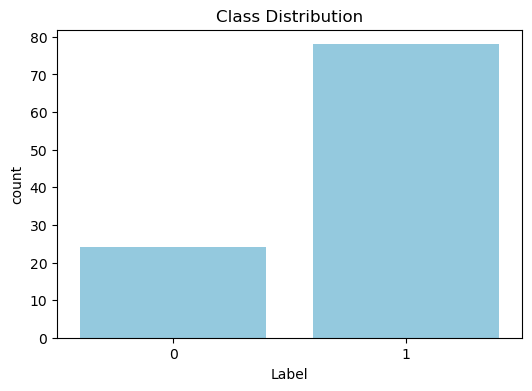

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df, color='skyblue')

plt.title("Class Distribution")
plt.show()


We counted the number of samples in each class and visualize them with a bar chart.  
The results showed that the dataset is imbalanced, with the majority class having significantly more samples than the minority class.  
This imbalance can cause biased models that favor the majority class.


In [20]:
# Apply undersampling
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Label', axis=1)
y = df['Label']


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(" After Undersampling:")
print(y_res.value_counts())

print ( " Disadvantage: risk of losing important information ")


 After Undersampling:
Label
0    24
1    24
Name: count, dtype: int64
 Disadvantage: risk of losing important information 


We apply Random Undersampling, where samples from the majority class are randomly removed to match the minority class size.  
This balances the dataset but may lead to loss of valuable information since a portion of the data is discarded.


In [21]:
# Apply oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("After Oversampling:")
print(y_res.value_counts())

print ("Disadvatage: risk of overfitting because same samples are repeated")




After Oversampling:
Label
0    78
1    78
Name: count, dtype: int64
Disadvatage: risk of overfitting because same samples are repeated


We apply Random Oversampling, where minority class samples are randomly duplicated until class sizes are balanced.  
This improves representation of the minority class but may lead to overfitting because the same data points are repeated.


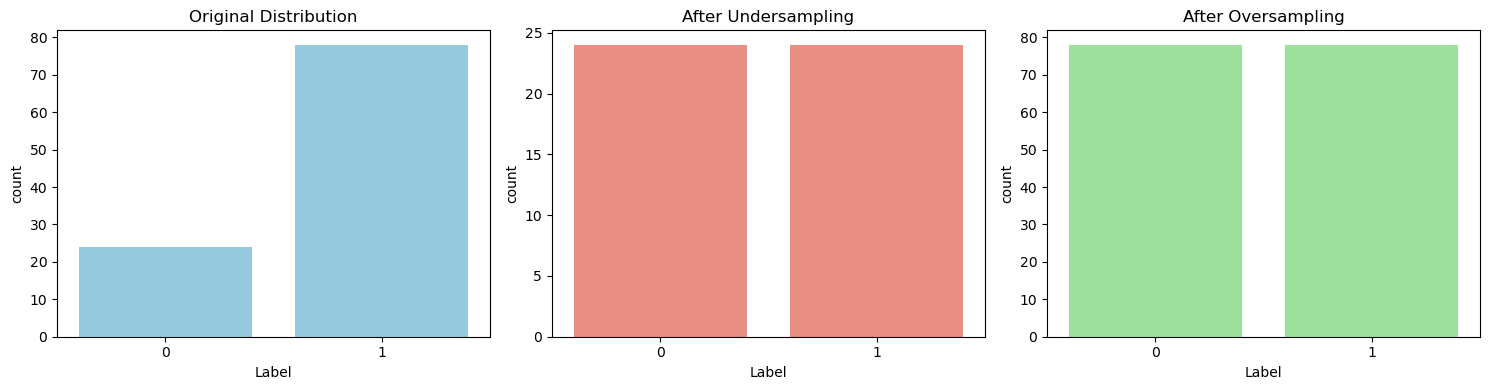

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Undersampling 
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
sns.countplot(x=y, ax=axes[0], color="skyblue")
axes[0].set_title("Original Distribution")

sns.countplot(x=y_under, ax=axes[1], color="salmon")
axes[1].set_title("After Undersampling")

sns.countplot(x=y_over, ax=axes[2], color="lightgreen")
axes[2].set_title("After Oversampling")

plt.tight_layout()
plt.show()


Both undersampling and oversampling help address imbalance, but :  
- Undersampling reduces training time but risks information loss.  
- Oversampling preserves information but can cause overfitting.  


# **Step 3:Exploratory Data Analysis**

Exploratory Data Analysis (EDA) involves analyzing and summarizing the key characteristics of the dataset to uncover patterns, detect anomalies, and gain insights that inform subsequent modeling. For the Arthritis Profile Dataset, EDA is crucial to understand the relationships among clinical, biochemical, and lifestyle factors and their influence on arthritis severity.

What is the distribution of key biomarkers like CRP, ESRh and ESRo, and RF?

Is there a relationship between Age and Calcium?

Is there a significant relationship between gender and Red Blood Count?

We analyse the results and what can we learn from these results. 

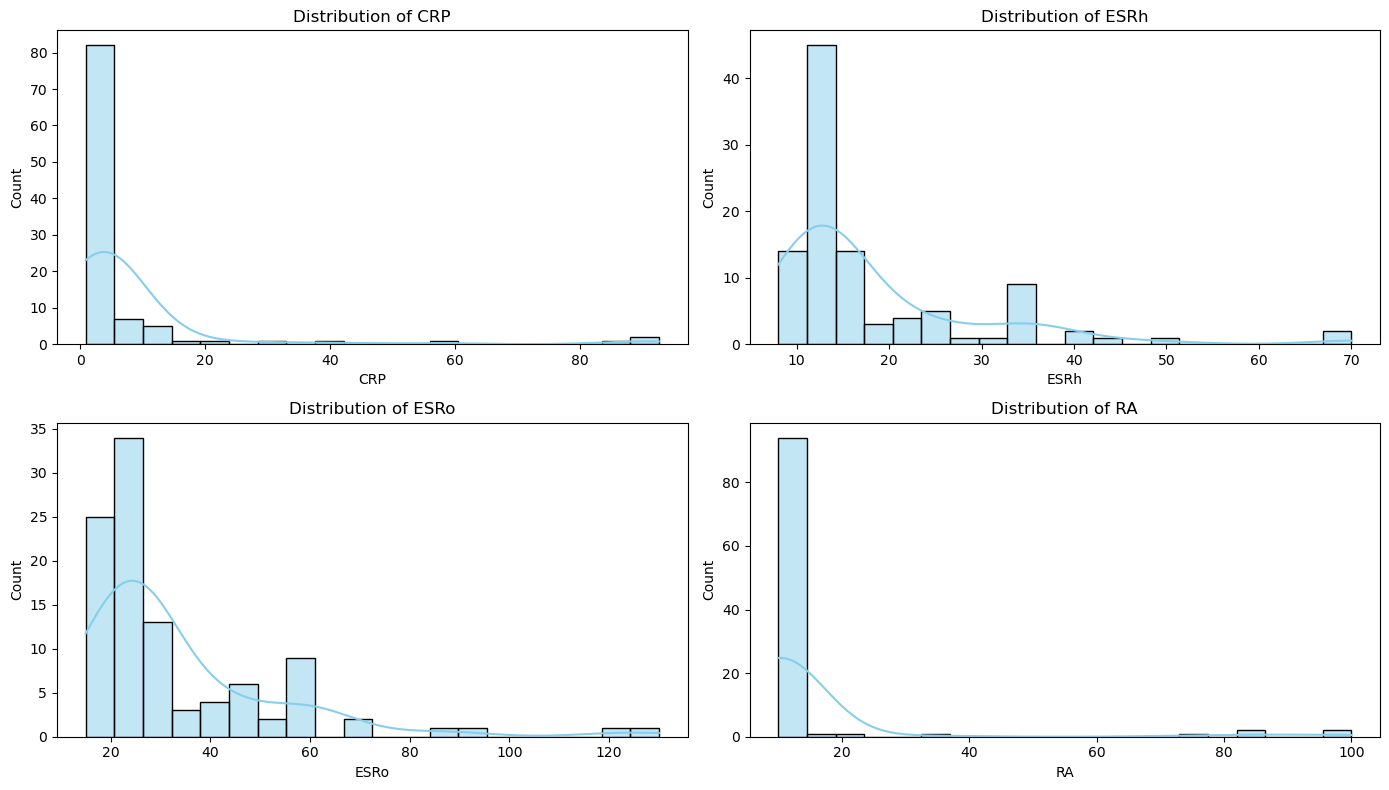

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

biomarkers = ["CRP", "ESRh", "ESRo", "RA"]  

plt.figure(figsize=(14,8))

for i, col in enumerate(biomarkers, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


The distributions of CRP, ESRh, ESRo, and RF are right-skewed.  
Most patients have normal values, but a few cases show extremely high values.  

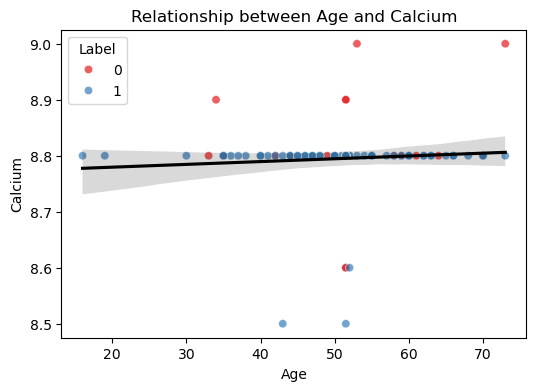

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Calcium", data=df, hue="Label", palette="Set1", alpha=0.7)
sns.regplot(x="Age", y="Calcium", data=df, scatter=False, color="black")
plt.title("Relationship between Age and Calcium")
plt.show()


The scatterplot of Age vs. Calcium shows no strong correlation.  
Calcium levels remain relatively stable across different age groups, suggesting age is not a major determinant of calcium levels in this dataset.


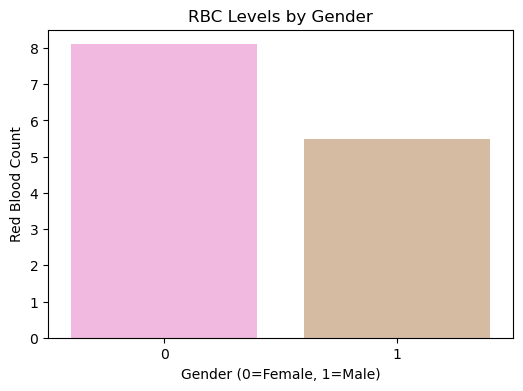

In [25]:
plt.figure(figsize=(6,4))

sns.barplot(x="Gender_M", y="RBC", data=df,
            hue="RBC", dodge=False, palette="pastel", legend=False)

plt.title("RBC Levels by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Red Blood Count")
plt.show()


The RBC count in males vs females was statistically insignificant, indicating that gender does not strongly affect RBC in this dataset.  
This suggests RBC levels are likely influenced more by clinical conditions rather than gender.


- Biomarker distributions highlight the presence of important outliers.  
- Age does not significantly influence calcium levels.  
- Gender does not show a meaningful relationship with RBC counts.  


Overall, the dataset highlights the presence of outliers in biomarker distributions but suggests that age and gender are not strong determinants of calcium and RBC levels, respectively.

# **Step 4: Feature Engineering**


**Part 4.1**: Using a Correlation technique, can you detect the correlated features by using heatmap? 
For finding sets of correlated features, you need to use a threshold.This Threshold is defined by developer. 

**Part 4.2**: Using Mutual information, we identify important features and visualize the score of each feature.

To summarise, we need to remove correlated features from the corresponding data. Removing highly correlated features is a crucial preprocessing step in machine learning to improve model performance, interpretability, generalization, and computational efficiency. It helps create more robust and efficient models that are better suited for real-world applications.


**Part 4.3:** To remove correlated features and then present the list of remaining features. 

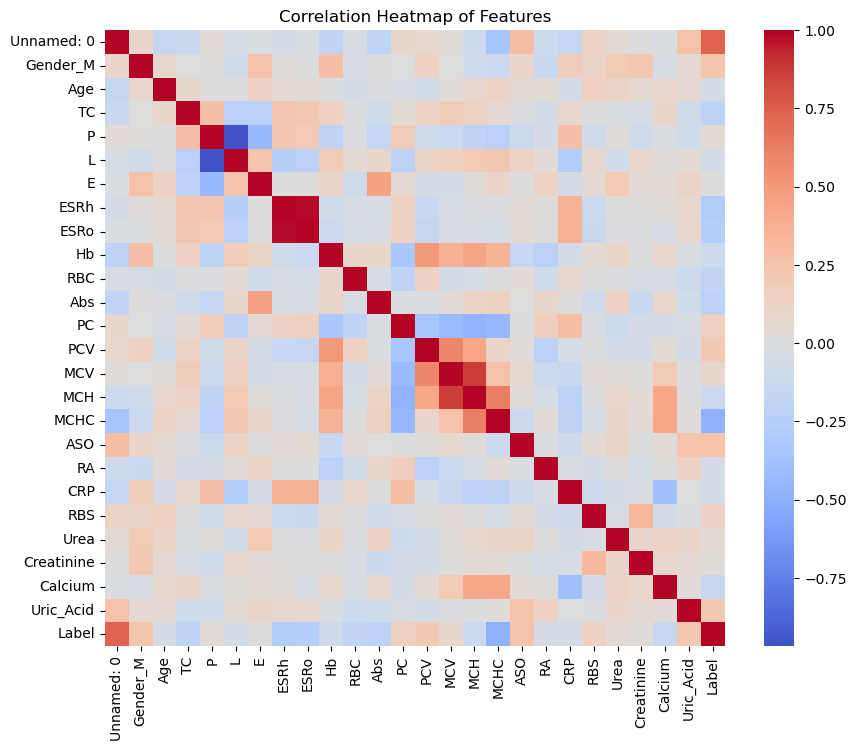

Highly Correlated Feature Pairs (|r| > 0.5):
('ESRo', 'ESRh', 0.9818308048521891)
('ESRh', 'ESRo', 0.9818308048521891)
('MCH', 'MCV', 0.869230249469613)
('MCV', 'MCH', 0.869230249469613)
('Label', 'Unnamed: 0', 0.7347409582224913)
('Unnamed: 0', 'Label', 0.7347409582224913)
('MCH', 'MCHC', 0.6253002040472475)
('MCHC', 'MCH', 0.6253002040472475)
('PCV', 'MCV', 0.5837760311955323)
('MCV', 'PCV', 0.5837760311955323)
('PCV', 'Hb', 0.5024838274894804)
('Hb', 'PCV', 0.5024838274894804)
('P', 'L', -0.9676567308314167)
('L', 'P', -0.9676567308314167)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

# Find correlated pairs above threshold (0.5)
threshold = 0.5
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Zip index and values correctly
high_corr = [(i, j, val) for (i, j), val in corr_pairs.items() if abs(val) > threshold and i != j]

print("Highly Correlated Feature Pairs (|r| > 0.5):")
for pair in high_corr[:20]:  # print first 20 pairs
    print(pair)


Using a threshold of 0.5, several features were found to be moderately or highly correlated.  
Keeping strongly correlated features can cause redundancy, multicollinearity, and overfitting, so they need to be reduced.


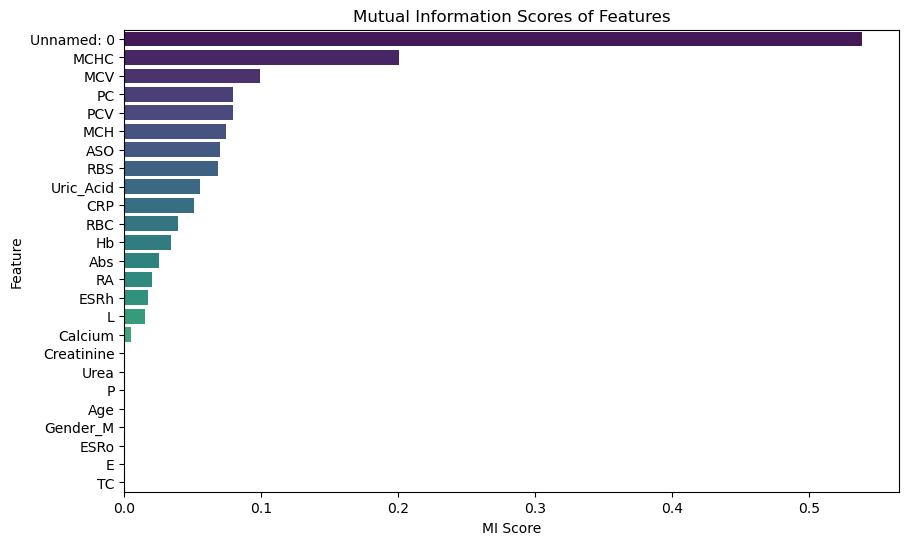

Top features based on Mutual Information:
       Feature  MI Score
0   Unnamed: 0  0.539095
16        MCHC  0.200540
14         MCV  0.098946
12          PC  0.079099
13         PCV  0.078999


In [28]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

X = df.drop(columns=["Label"])
y = df["Label"]

X_numeric = X.select_dtypes(include=[np.number])

# Compute mutual information
mi_scores = mutual_info_classif(X_numeric, y, random_state=42)

mi_df = pd.DataFrame({"Feature": X_numeric.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="MI Score", y="Feature", data=mi_df,
            hue="Feature", dodge=False, palette="viridis", legend=False)

plt.title("Mutual Information Scores of Features")
plt.show()

print("Top features based on Mutual Information:")
print(mi_df.head())


We applied Mutual Information (MI) to measure the dependency between each feature and the target variable.  
Features with higher MI scores contribute more to predicting the target.  

Recommendation for Removing Correlated Features: 

- From Part 4.1 (Heatmap & Correlations):
Features with correlation >0.5 are considered strongly correlated. We should keep one feature from each highly correlated pair.

- From Part 4.2 (Mutual Information):
Among correlated features, keep the one with higher MI score (more predictive of the target).

********************************************************

Now, our data is ready to start our model training and other necessary steps.


**Note:** For each question, be sure to discuss the answer technically and provide an analysis of the results.